# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv", index_col=0)
south_df = pd.read_csv("SouthCallCenter.csv", index_col=0)

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [3]:
# Put your EDA code here
north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [4]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 245 non-null    object 
 1   Call Purpose           245 non-null    object 
 2   Time Block             245 non-null    object 
 3   Incoming or Outgoing   245 non-null    object 
 4   Queue                  245 non-null    object 
 5   Rep ID                 245 non-null    object 
 6   Sale                   245 non-null    object 
 7   Lost Call              245 non-null    int64  
 8   Abandoned              245 non-null    int64  
 9   Busy Minutes           245 non-null    int64  
 10  Not Ready Minutes      245 non-null    int64  
 11  Incoming Wait Time     82 non-null     float64
 12  During Call Wait Time  245 non-null    int64  
 13  Calls                  245 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 28.7+ KB


In [5]:
# averages for north
#north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()
north_df.describe()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [6]:
# reps in north call center
north_df['Rep ID'].nunique()

9

In [7]:
# number of calls each time block - north
north_df[['Time Block', 'Calls']].groupby('Time Block').count()
#north_df.groupby(['Time Block', 'Calls'])['Time Block'].count()

,Calls
Time Block,
10:00 AM,43
11:00 AM,25
12:00 PM,45
1:00 PM,17
2:00 PM,35
3:00 PM,30
4:00 PM,28
5:00 PM,17
9:00 AM,5


In [8]:
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [9]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 314 non-null    object 
 1   Call Purpose           314 non-null    object 
 2   Time Block             314 non-null    object 
 3   Incoming or Outgoing   314 non-null    object 
 4   Queue                  314 non-null    object 
 5   Rep ID                 314 non-null    object 
 6   Sale                   314 non-null    object 
 7   Lost Call              314 non-null    int64  
 8   Abandoned              314 non-null    int64  
 9   Busy Minutes           314 non-null    int64  
 10  Not Ready Minutes      314 non-null    int64  
 11  Incoming Wait Time     126 non-null    float64
 12  During Call Wait Time  314 non-null    int64  
 13  Calls                  314 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 36.8+ KB


In [10]:
south_df.describe()
#south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [11]:
# reps in south call center
south_df['Rep ID'].nunique()

11

In [12]:
# number of calls each time block - south
south_df[['Time Block', 'Calls']].groupby('Time Block').count()

,Calls
Time Block,
10:00 AM,56
11:00 AM,31
12:00 PM,75
1:00 PM,23
2:00 PM,30
3:00 PM,43
4:00 PM,25
5:00 PM,26
9:00 AM,5


## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [13]:
# Clean your data here

# check for duplicates

north_df[north_df.duplicated()]
#north_df.duplicated().sum()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [14]:
# check if all null values in 'Incoming Wait Time' are outgoing calls - north
north_df[["Incoming or Outgoing", "Incoming Wait Time"]].groupby("Incoming or Outgoing").sum()

,Incoming Wait Time
Incoming or Outgoing,
Incoming,250.0
Outgoing,0.0


In [15]:
# display the values in 'Sale'
north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [16]:
# 2nd 'YES' value has a space at the end (trailing whitespace)
north_df.loc[(north_df['Sale'] == 'YES') | (north_df['Sale'] == 'YES ')]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0,0,11,2,2.0,4,1
40,North,Sales Support,12:00 PM,Incoming,B,Lilly,YES,0,0,10,1,3.0,2,1
47,North,Sales Support,10:00 AM,Incoming,A,Amanda,YES,0,0,10,3,4.0,3,1
67,North,Sales Support,12:00 PM,Incoming,B,Todd,YES,0,0,9,3,5.0,4,1
69,North,Sales Support,12:00 PM,Incoming,A,Andy,YES,0,0,10,1,5.0,2,1
86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
99,North,Sales Support,10:00 AM,Outgoing,A,Andy,YES,0,0,12,2,NaN,2,1
108,North,Sales Support,11:00 AM,Outgoing,B,Lilly,YES,0,0,8,3,NaN,2,1
220,North,Product Support,4:00 PM,Outgoing,A,Cam,YES,0,0,8,1,NaN,3,1


In [17]:
# remove trailing whitespace
north_df['Sale'] = north_df['Sale'].str.strip()

# checking if whitespace has been removed
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [18]:
# check for duplicates

south_df[south_df.duplicated()]
#south_df.duplicated().sum()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [19]:
# check if all null values in 'Incoming Wait Time' are outgoing calls - south
south_df[["Incoming or Outgoing", "Incoming Wait Time"]].groupby("Incoming or Outgoing").sum()

,Incoming Wait Time
Incoming or Outgoing,
Incoming,378.0
Outgoing,0.0


## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [20]:
# Manipulate data here

# stack dataframes on top of each other
df = pd.concat([north_df, south_df], ignore_index=True, keys=["North Branch", "South Branch"])
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [21]:
no_of_calls = df.groupby('Rep ID').sum().sort_values(by='Calls', ascending=False)
#no_of_calls = df[['Rep ID', 'Branch', 'Calls']].groupby('Rep ID').sum().sort_values(by='Calls', ascending=False)
#no_of_calls = df.groupby('Rep ID').sum()
#no_of_calls = df.groupby('Rep ID').sum().sort_values(by='Calls', ascending=False)
no_of_calls

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Brent,0,1,362,71,17.0,117,37
Eric,0,0,361,54,47.0,112,35
Randy,3,1,320,66,47.0,98,33
Sandy,1,0,325,60,34.0,100,32
Helga,0,2,292,58,36.0,95,31
Lilly,0,2,307,59,37.0,88,30
Todd,1,0,296,58,21.0,97,29
Duke,2,0,292,56,39.0,85,29
George,0,0,298,53,41.0,87,29


In [22]:
# average call abandonment rate for each branch
aband_rate_branch = df.groupby('Branch')['Abandoned'].agg('mean')
aband_rate_branch

Branch
North    0.028571
South    0.012739
Name: Abandoned, dtype: float64

In [23]:
# average call abandonment rate for the whole company
aband_rate_co = df['Abandoned'].mean()
aband_rate_co

0.01967799642218247

In [24]:
# total no. of calls answered within 2 seconds
ideal_calls = df[df['Incoming Wait Time'] <= 2.0]
#ideal_calls
#ideal_branch = ideal_calls.groupby(['Branch']).sum()
#ideal_branch
#service_level = ('Calls'/'Incoming Wait Time')*100
ideal_branch = ideal_calls[['Branch', 'Incoming Wait Time','Calls']].groupby('Branch').sum()
ideal_branch

,Incoming Wait Time,Calls
Branch,,
North,49.0,33
South,76.0,48


In [25]:
# average speed of answer by branch
avg_speed_branch = df[['Branch', 'Incoming Wait Time']].groupby('Branch').mean()
avg_speed_branch

,Incoming Wait Time
Branch,
North,3.04878
South,3.00000


In [26]:
# average speed of answer company wide
avg_speed_co = df['Incoming Wait Time'].mean()
avg_speed_co

3.019230769230769

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

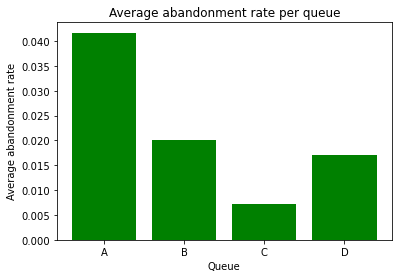

In [31]:
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

# Create visualization 1 here

# bar chart

x = abandonment_rates.keys()
y = abandonment_rates.values()

plt.bar(x, y, color='green')
plt.title('Average abandonment rate per queue')
plt.xlabel('Queue')
plt.ylabel('Average abandonment rate')
plt.show()

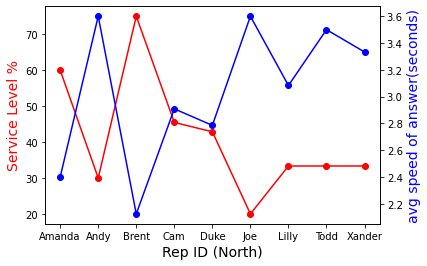

In [99]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# Create new table showing both service level and average speed of answer of each rep 
service_speed = pd.merge(service_level, north_plt, on="Rep ID")


# dual axis chart

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot()
# make a plot
ax.plot(service_speed['Rep ID'], service_speed['Service Level %'], color="red", marker="o")
# set x-axis label
ax.set_xlabel('Rep ID (North)', fontsize=14)
# set y-axis label
ax.set_ylabel('Service Level %', color="red", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(service_speed['Rep ID'], service_speed['Incoming Wait Time'],color="blue",marker="o")
ax2.set_ylabel('avg speed of answer(seconds)', color="blue", fontsize=14)

plt.show()

# I should have used subplots for #2

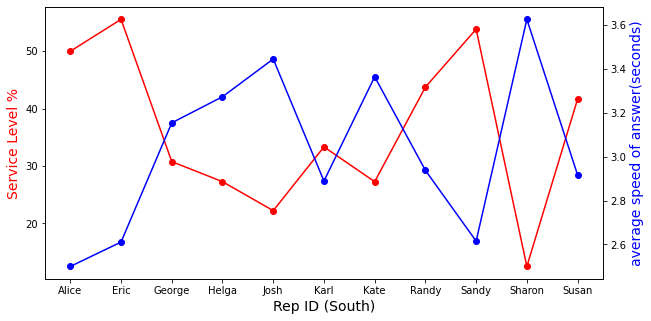

In [100]:
# south_plt contains the data for the average speed of answer of each rep (south call center)

south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls_sth = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps_sth = quick_calls_sth[["Rep ID", "Calls"]]
quick_stats_sth = quick_reps_sth.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in_sth = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls_sth = total_calls_in_sth[["Rep ID", "Calls"]]     
total_stats_sth = rep_calls_sth.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level_sth = pd.merge(quick_stats_sth, total_stats_sth, on="Rep ID")

# Create Percentage Column in Table 3
service_level_sth["Service Level %"] = service_level_sth["Calls_x"]/service_level_sth["Calls_y"] * 100

# Create new table showing both service level and average speed of answer of each rep 
service_speed_sth = pd.merge(service_level_sth, south_plt, on="Rep ID")


# dual axis chart

# create figure and axis objects with subplots()
# fig,ax = plt.subplots()
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
# make a plot
ax.plot(service_speed_sth['Rep ID'], service_speed_sth['Service Level %'], color="red", marker="o")
# set x-axis label
ax.set_xlabel('Rep ID (South)', fontsize=14)
# set y-axis label
ax.set_ylabel('Service Level %', color="red", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(service_speed_sth['Rep ID'], service_speed_sth['Incoming Wait Time'], color="blue",marker="o")
ax2.set_ylabel('average speed of answer(seconds)', color="blue", fontsize=14)
plt.show()

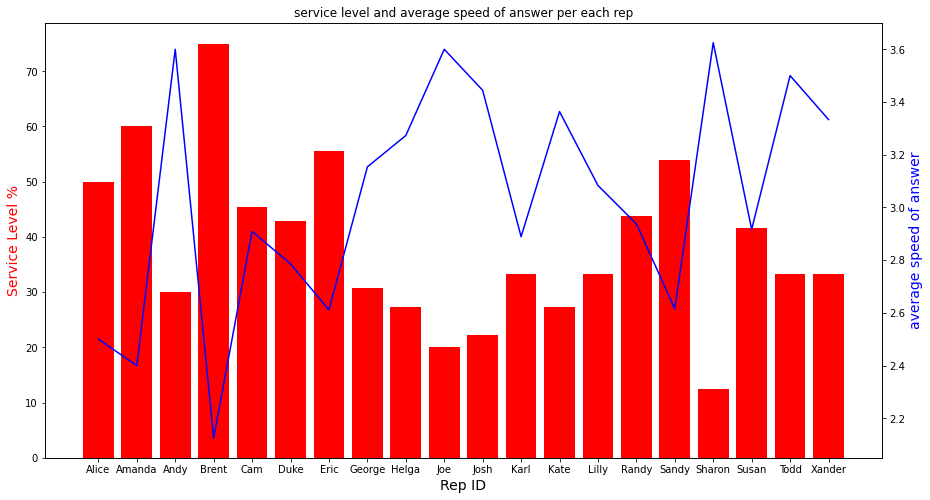

In [62]:
# df_plt contains the data for the average speed of answer of each rep (whole company)

df_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# Create new table showing both service level and average speed of answer of each rep 
service_speed = pd.merge(service_level, df_plt, on="Rep ID")

# Create visualization 2 here

# dual axis chart

# create figure and axis objects with subplots()
fig = plt.figure(1, figsize=(15,8))
ax = fig.add_subplot()
# make a bar chart to represent service level percentage
barchart = plt.bar(service_speed['Rep ID'], service_speed['Service Level %'], color='red', label='Rep ID')
# set x-axis label
ax.set_xlabel('Rep ID', fontsize=14)
# set y-axis label
ax.set_ylabel('Service Level %', color="red", fontsize=14)
# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
# make a line chart
linechart = plt.plot(service_speed['Rep ID'], service_speed['Incoming Wait Time'], color='blue')
# 2nd y-axis for average speed of answer
ax2.set_ylabel('average speed of answer', color="blue", fontsize=14)
# set chart title
plt.title('service level and average speed of answer per each rep')

plt.show()


<AxesSubplot:xlabel='Call Purpose'>

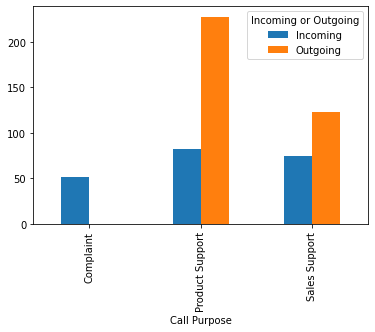

In [84]:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


# Create visualization 3 here
# grouped bar chart
calls_made = df.groupby("Incoming or Outgoing")["Call Purpose"].value_counts().unstack(0).plot.bar()
calls_made

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
